In [33]:
import pandas as pd
pd.set_option('display.max_rows', None)

# Load the dataset
df = pd.read_csv("shopping_trends.csv")

# Display the first few rows of the dataset
print(df.head())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [34]:
# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical columns
print(df.describe())

# Unique values in categorical columns
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [35]:
# Group data by category and calculate the average purchase amount
average_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean()

# Display average purchase amount by category
print(average_purchase_by_category)

# Identify categories where the average purchase amount is relatively high
high_average_purchase_categories = average_purchase_by_category[average_purchase_by_category > average_purchase_by_category.mean()]

print("Categories with higher than average purchase amount:", high_average_purchase_categories.index.tolist())

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64
Categories with higher than average purchase amount: ['Accessories', 'Clothing', 'Footwear']


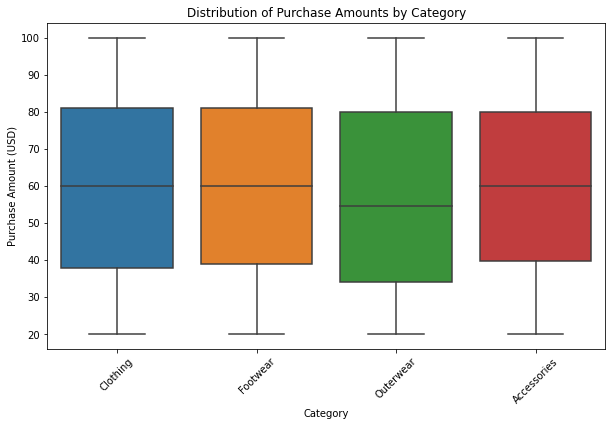

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of purchase amounts by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.title('Distribution of Purchase Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Calculate IQR and CV for each category
category_stats = df.groupby('Category')['Purchase Amount (USD)'].agg(['median', 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)])
category_stats.columns = ['Median', 'Standard Deviation', 'IQR']

# Calculate coefficient of variation (CV)
category_stats['CV'] = category_stats['Standard Deviation'] / category_stats['Median']

# Sort categories by CV in descending order
category_stats = category_stats.sort_values(by='CV', ascending=False)

print(category_stats)

             Median  Standard Deviation    IQR        CV
Category                                                
Outerwear      54.5           24.590033  46.00  0.451193
Clothing       60.0           23.792460  43.00  0.396541
Footwear       60.0           23.638439  42.00  0.393974
Accessories    60.0           23.301230  40.25  0.388354


In [ ]:
# Implications for Discount Strategies: Based on the analysis:

-> Outerwear, Clothing, Footwear, and Accessories all have relatively similar median purchase amounts but differ in variability measures.
-> Outerwear exhibits the highest variability (as indicated by the highest standard deviation and IQR), followed closely by Clothing, Footwear, and Accessories.
-> The coefficient of variation is relatively similar across categories, indicating that variability is consistent relative to the median purchase amount.

Considering the variability metrics, Outerwear stands out as the category with the highest variability in purchase amounts. Therefore, applying discounts strategically within the Outerwear category could potentially attract customers with diverse spending preferences and encourage higher sales. Additionally, discounts could also be considered for Clothing, Footwear, and Accessories, although to a slightly lesser extent compared to Outerwear.


In [37]:
# Define age ranges
age_ranges = {
    '18-30': range(18, 31),
    '31-45': range(31, 46),
    '46-60': range(46, 61),
    '60+': range(61, 120)  # Assuming maximum age is 120
}

# Function to map age to age range
def map_age_to_range(age):
    for range_name, age_range in age_ranges.items():
        if age in age_range:
            return range_name
    return 'Unknown'

# Apply age range mapping to create a new column
df['Age Range'] = df['Age'].apply(map_age_to_range)

In [38]:
# Calculate the average purchase amount for each age range, season, and location combination
average_purchase_by_age_season_location = df.groupby(['Age Range', 'Season', 'Location'])['Purchase Amount (USD)'].mean()

# Display the summarized data
print(average_purchase_by_age_season_location)


Age Range  Season  Location      
18-30      Fall    Alabama           45.500000
                   Alaska            62.800000
                   Arizona           94.333333
                   Arkansas          79.000000
                   California        86.250000
                   Colorado          27.000000
                   Connecticut       73.000000
                   Delaware          73.500000
                   Florida           48.000000
                   Georgia           66.250000
                   Hawaii            62.800000
                   Idaho             71.833333
                   Illinois          61.000000
                   Indiana           63.500000
                   Iowa              59.500000
                   Kansas            56.000000
                   Kentucky          53.750000
                   Louisiana         43.000000
                   Maine             50.500000
                   Maryland          51.000000
                   Massach

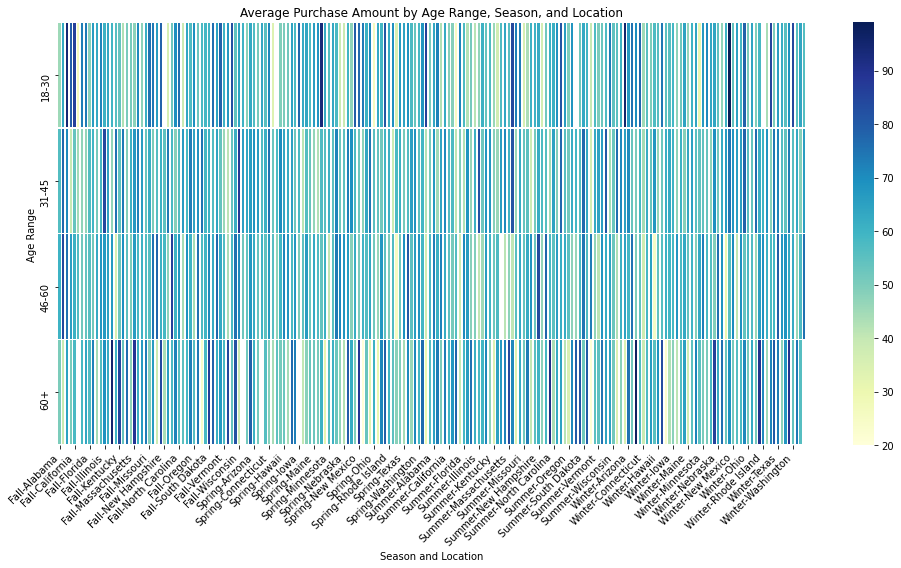

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data for visualization
average_purchase_by_age_season_location = average_purchase_by_age_season_location.reset_index()
pivot_table = average_purchase_by_age_season_location.pivot_table(index='Age Range', columns=['Season', 'Location'], values='Purchase Amount (USD)')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Purchase Amount by Age Range, Season, and Location')
plt.xlabel('Season and Location')
plt.ylabel('Age Range')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
From The above analyse for the second problem statement.

In [40]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type','Discount Applied','Preferred Payment Method','Payment Method','Promo Code Used', 'Frequency of Purchases'])

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

   Customer ID  Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
0            1   55                     53            3.1                  14   
1            2   19                     64            3.1                   2   
2            3   50                     73            3.1                  23   
3            4   21                     90            3.5                  49   
4            5   45                     49            2.7                  31   

  Age Range  Gender_Female  Gender_Male  Item Purchased_Backpack  \
0     46-60              0            1                        0   
1     18-30              0            1                        0   
2     46-60              0            1                        0   
3     18-30              0            1                        0   
4     31-45              0            1                        0   

   Item Purchased_Belt  ...  Payment Method_Venmo  Promo Code Used_No  \
0                    0  ...    

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns to scale
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Scale the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled dataframe
print(df_encoded.head())

   Customer ID       Age  Purchase Amount (USD)  Review Rating  \
0            1  0.711538                 0.4125           0.24   
1            2  0.019231                 0.5500           0.24   
2            3  0.615385                 0.6625           0.24   
3            4  0.057692                 0.8750           0.40   
4            5  0.519231                 0.3625           0.08   

   Previous Purchases Age Range  Gender_Female  Gender_Male  \
0            0.265306     46-60              0            1   
1            0.020408     18-30              0            1   
2            0.448980     46-60              0            1   
3            0.979592     18-30              0            1   
4            0.612245     31-45              0            1   

   Item Purchased_Backpack  Item Purchased_Belt  ...  Payment Method_Venmo  \
0                        0                    0  ...                     0   
1                        0                    0  ...                

In [44]:
# Drop the 'Age Range' column
df_encoded.drop('Age Range', axis=1, inplace=True)
df_encoded.drop('Customer ID', axis=1, inplace=True)

In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select relevant features for clustering
clustering_data = df_encoded[['Age', 'Purchase Amount (USD)', 'Review Rating']]

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the clusters
print(df_encoded['Cluster'].value_counts())

# Explore cluster characteristics
cluster_summary = df_encoded.groupby('Cluster').mean()
print(cluster_summary)


C:\Users\UTSAB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    1485
1    1264
0    1151
Name: Cluster, dtype: int64
              Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
Cluster                                                                       
0        0.484796               0.213879       0.680243            0.492243   
1        0.495710               0.770955       0.686582            0.503730   
2        0.518894               0.483401       0.201428            0.494881   

         Gender_Female  Gender_Male  Item Purchased_Backpack  \
Cluster                                                        
0             0.311903     0.688097                 0.039965   
1             0.320411     0.679589                 0.036392   
2             0.325926     0.674074                 0.034343   

         Item Purchased_Belt  Item Purchased_Blouse  Item Purchased_Boots  \
Cluster                                                                     
0                   0.039965               0.036490              0.0304

In [ ]:
Cluster 0:
Demographics: The average age of customers in this cluster is around 48.5 years.
Purchase Behavior: Customers in this cluster tend to make smaller purchases, with an average purchase amount of around 21.4 USD.
Review Rating: The average review rating given by customers in this cluster is relatively high, around 0.68.
Payment Method: The majority of customers in this cluster use traditional payment methods, with around 43.3% using credit/debit cards and 16.2% using Venmo.
Promo Code Usage: About 43.3% of customers in this cluster use promo codes for their purchases.
Frequency of Purchases: Customers in this cluster tend to make purchases weekly or every three months.

Cluster 1:
Demographics: The average age of customers in this cluster is similar to Cluster 0, around 49.6 years.
Purchase Behavior: Customers in this cluster make larger purchases compared to other clusters, with an average purchase amount of around 77.1 USD.
Review Rating: Similar to Cluster 0, customers in this cluster also give relatively high review ratings, around 0.69.
Payment Method: Most customers in this cluster also prefer traditional payment methods, with around 41.3% using credit/debit cards and 17.5% using Venmo.
Promo Code Usage: Around 41.3% of customers in this cluster use promo codes for their purchases.
Frequency of Purchases: Customers in this cluster tend to make purchases bi-weekly or every three months.

Cluster 2:
Demographics: Customers in this cluster are slightly younger, with an average age of around 51.9 years.
Purchase Behavior: The average purchase amount for customers in this cluster is moderate, around 48.3 USD.
Review Rating: Customers in this cluster tend to give lower review ratings compared to other clusters, with an average rating of around 0.20.
Payment Method: Similar to other clusters, the majority of customers in this cluster prefer traditional payment methods, with around 42.4% using credit/debit cards and 16.5% using Venmo.
Promo Code Usage: About 44.2% of customers in this cluster use promo codes for their purchases.
Frequency of Purchases: Customers in this cluster also tend to make purchases weekly or every three months.
These insights provide a clear understanding of the characteristics and behaviors of customers within each cluster, enabling targeted marketing strategies and personalized customer experiences.




